In [1]:
import dlib

## Facial Morphing technique using Laplacian and Gaussian Pyramids


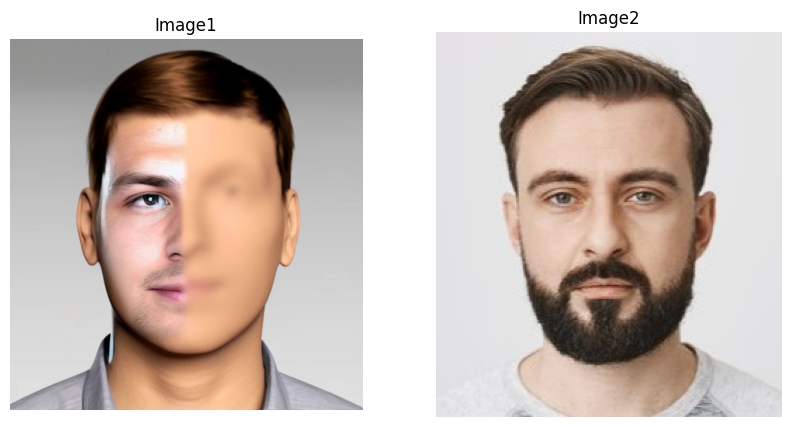

In [2]:
import cv2
from matplotlib import pyplot as plt

# Replace this with your actual file paths
damaged_image_path = 'damaged_face2.jpg'
complete_image_path = 'complete_face2.jpg'

# Load the damaged and complete images
damaged_image = cv2.imread(damaged_image_path)
complete_image = cv2.imread(complete_image_path)

# Convert images from BGR to RGB for displaying with matplotlib
damaged_image_rgb = cv2.cvtColor(damaged_image, cv2.COLOR_BGR2RGB)
complete_image_rgb = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB)

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(damaged_image_rgb)
axes[0].set_title('Image1')
axes[0].axis('off')

axes[1].imshow(complete_image_rgb)
axes[1].set_title('Image2')
axes[1].axis('off')

plt.show()


In [3]:
import cv2

# Replace these with the paths to your images
damaged_face_path = 'damaged_face2.jpg'
complete_face_path = 'complete_face2.jpg'

# Load the images
damaged_face = cv2.imread(damaged_face_path)
complete_face = cv2.imread(complete_face_path)

# Ensure both images were loaded correctly
if damaged_face is None or complete_face is None:
    raise ValueError("Could not load one or both images. Please check the file paths.")

# Get the dimensions to resize to (the smallest of the two images)
new_height = min(damaged_face.shape[0], complete_face.shape[0])
new_width = min(damaged_face.shape[1], complete_face.shape[1])

# Resize both images to the smallest dimensions
resized_damaged_face = cv2.resize(damaged_face, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
resized_complete_face = cv2.resize(complete_face, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Now you can save or display the resized images
cv2.imwrite('resized_damaged_face2.jpg', resized_damaged_face)
cv2.imwrite('resized_complete_face2.jpg', resized_complete_face)

True

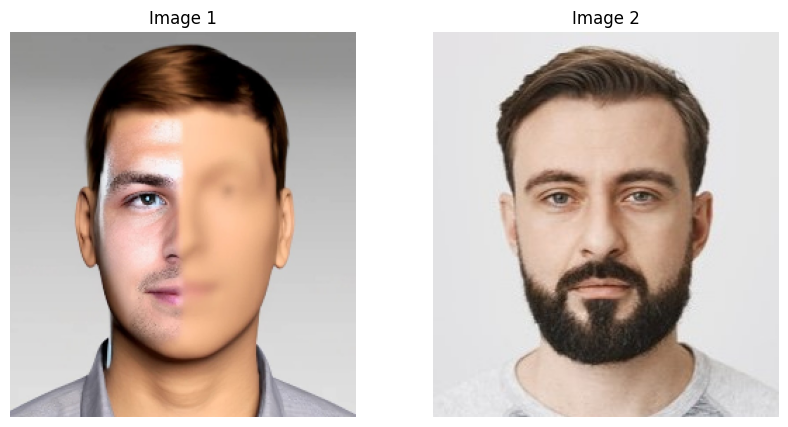

In [4]:
import cv2
import matplotlib.pyplot as plt

def read_and_resize_images(image_path1, image_path2):
    # Read the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Check if images are loaded
    if image1 is None or image2 is None:
        raise ValueError("One or both images didn't load.")

    # Resize images to match the smaller one
    new_height = min(image1.shape[0], image2.shape[0])
    new_width = min(image1.shape[1], image2.shape[1])

    resized_image1 = cv2.resize(image1, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    resized_image2 = cv2.resize(image2, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
    # Convert from BGR to RGB for displaying
    resized_image1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2RGB)
    resized_image2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)
    
    # Display the images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(resized_image1)
    plt.title('Image 1')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image2)
    plt.title('Image 2')
    plt.axis('off')
    
    plt.show()

# Paths to the images (you can change these to the correct paths for your images)
image_path1 = 'damaged_face2.jpg'
image_path2 = 'complete_face2.jpg'

# Call the function to read, resize, and display the images
read_and_resize_images(image_path1, image_path2)

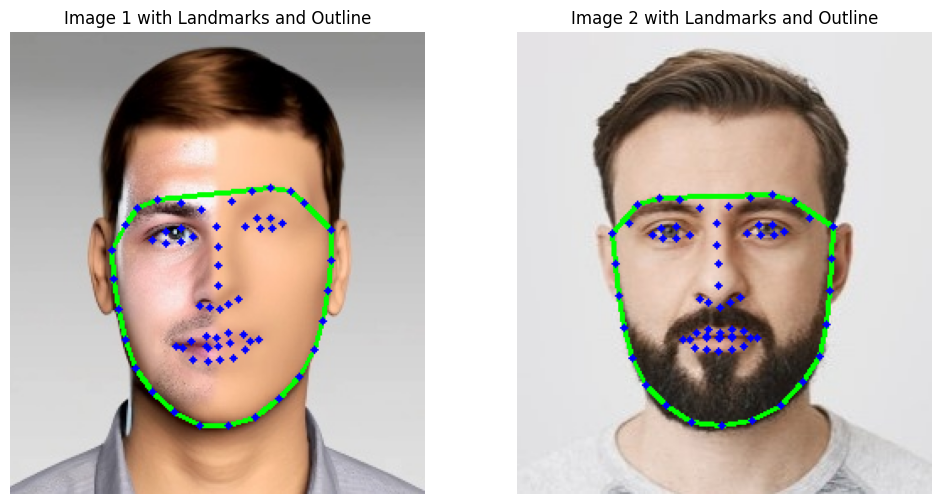

Size of outline 1: (132, 138) (width, height)
Size of outline 2: (132, 138) (width, height)


In [5]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Initialize dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def get_landmarks(image, detector, predictor):
    # Convert the image to grayscale, as the detector expects a grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use the detector to find the bounding box of the face
    faces = detector(gray)
    if len(faces) == 0:
        return None, None
    
    # Assume we are working with one face per image for simplicity
    face = faces[0]
    
    # Use the predictor to find the landmark points
    landmarks = predictor(gray, face)
    
    # Convert the landmark points to a 2D numpy array
    landmark_list = np.array([[p.x, p.y] for p in landmarks.parts()])
    
    # Find the convex hull of the landmarks to get the outline
    hull = cv2.convexHull(landmark_list)
    return landmark_list, hull

# Load the images
image1_path = 'resized_damaged_face2.jpg'  # Replace with your actual file path
image2_path = 'resized_complete_face2.jpg'  # Replace with your actual file path
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images were loaded
if image1 is None or image2 is None:
    raise ValueError("Could not load one or both images. Check the file paths.")

# Obtain landmarks and outlines for both images
landmarks1, outline1 = get_landmarks(image1, detector, predictor)
landmarks2, outline2 = get_landmarks(image2, detector, predictor)

# Check if landmarks were found
if landmarks1 is None or landmarks2 is None:
    raise ValueError("Could not find landmarks in one or both images.")

# Display the images with landmarks and outlines
image1_with_landmarks = image1.copy()
image2_with_landmarks = image2.copy()

# Draw landmarks and outlines on the images
cv2.polylines(image1_with_landmarks, [outline1], True, (0, 255, 0), 2)
for (x, y) in landmarks1:
    cv2.circle(image1_with_landmarks, (x, y), 2, (255, 0, 0), -1)

cv2.polylines(image2_with_landmarks, [outline2], True, (0, 255, 0), 2)
for (x, y) in landmarks2:
    cv2.circle(image2_with_landmarks, (x, y), 2, (255, 0, 0), -1)

# Convert the images to RGB for matplotlib display
image1_with_landmarks_rgb = cv2.cvtColor(image1_with_landmarks, cv2.COLOR_BGR2RGB)
image2_with_landmarks_rgb = cv2.cvtColor(image2_with_landmarks, cv2.COLOR_BGR2RGB)

# Display the images with landmarks and outlines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image1_with_landmarks_rgb)
plt.title('Image 1 with Landmarks and Outline')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2_with_landmarks_rgb)
plt.title('Image 2 with Landmarks and Outline')
plt.axis('off')
plt.show()

# Match the sizes of the outlines
outline1_rect = cv2.boundingRect(outline1)
outline2_rect = cv2.boundingRect(outline2)
x, y, w, h = outline2_rect

# Create an empty image with the same size as the bounding rectangle of outline1
outline1_resized = np.zeros((h, w, 3), dtype=np.uint8)

# Draw the outline on the empty image
cv2.polylines(outline1_resized, [outline1], True, (255, 255, 255), 2)

# Resize the outline1_resized to match the size of outline2
outline1_resized = cv2.resize(outline1_resized, (w, h))

# Display the sizes of the outlines
print("Size of outline 1:", outline1_resized.shape[1::-1], "(width, height)")
print("Size of outline 2:", outline2_rect[2:], "(width, height)")


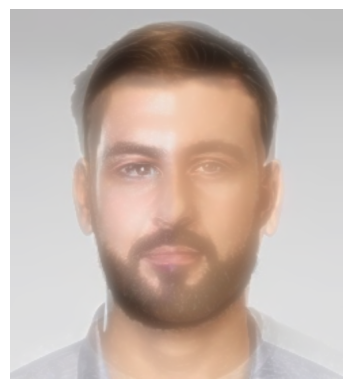

In [6]:
import cv2
import numpy as np

def resize_image(image, new_width):
    aspect_ratio = image.shape[1] / image.shape[0]
    new_height = int(new_width / aspect_ratio)
    resized_image = cv2.resize(image, (new_width, new_height))
    return resized_image

def build_gaussian_pyramid(image, num_levels):
    gaussian_pyramid = [image]
    for _ in range(1, num_levels):
        image = cv2.pyrDown(image)
        gaussian_pyramid.append(image)
    return gaussian_pyramid

def build_laplacian_pyramid(gaussian_pyramid):
    laplacian_pyramid = []
    num_levels = len(gaussian_pyramid)
    for i in range(num_levels - 1):
        src_size = (gaussian_pyramid[i].shape[1], gaussian_pyramid[i].shape[0])
        dst_size = ((src_size[0] * 2) // 2, (src_size[1] * 2) // 2)  # Compute destination size as half of double size
        gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i + 1], dstsize=dst_size)
        laplacian = cv2.subtract(gaussian_pyramid[i], gaussian_expanded)
        laplacian_pyramid.append(laplacian)
    laplacian_pyramid.append(gaussian_pyramid[-1])
    return laplacian_pyramid


def blend_pyramids(laplacian_pyramid1, laplacian_pyramid2):
    blended_pyramid = []
    for l1, l2 in zip(laplacian_pyramid1, laplacian_pyramid2):
        blended = cv2.addWeighted(l1, 0.5, l2, 0.5, 0)
        blended_pyramid.append(blended)
    return blended_pyramid

def reconstruct_from_pyramid(laplacian_pyramid):
    image = laplacian_pyramid[-1]
    for laplacian in reversed(laplacian_pyramid[:-1]):
        size = (laplacian.shape[1], laplacian.shape[0])
        image = cv2.pyrUp(image, dstsize=size)
        image = cv2.add(image, laplacian)
    return image

# Load the images
damaged_image = cv2.imread('resized_damaged_face2.jpg')
complete_image = cv2.imread('resized_complete_face2.jpg')

# Resize the images to have the same dimensions
new_width = 500  # Choose a common width
damaged_image = resize_image(damaged_image, new_width)
complete_image = resize_image(complete_image, new_width)

# Build pyramids
num_levels = 5  # Number of levels in the pyramid
damaged_gaussian_pyramid = build_gaussian_pyramid(damaged_image, num_levels)
complete_gaussian_pyramid = build_gaussian_pyramid(complete_image, num_levels)

damaged_laplacian_pyramid = build_laplacian_pyramid(damaged_gaussian_pyramid)
complete_laplacian_pyramid = build_laplacian_pyramid(complete_gaussian_pyramid)

# Blend pyramids
blended_laplacian_pyramid = blend_pyramids(damaged_laplacian_pyramid, complete_laplacian_pyramid)

# Reconstruct the image from the blended pyramid
blended_image = reconstruct_from_pyramid(blended_laplacian_pyramid)

# Save or display the result
cv2.imwrite('blended_image.jpg', blended_image)
cv2.imshow('Blended Image', blended_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display using matplotlib
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


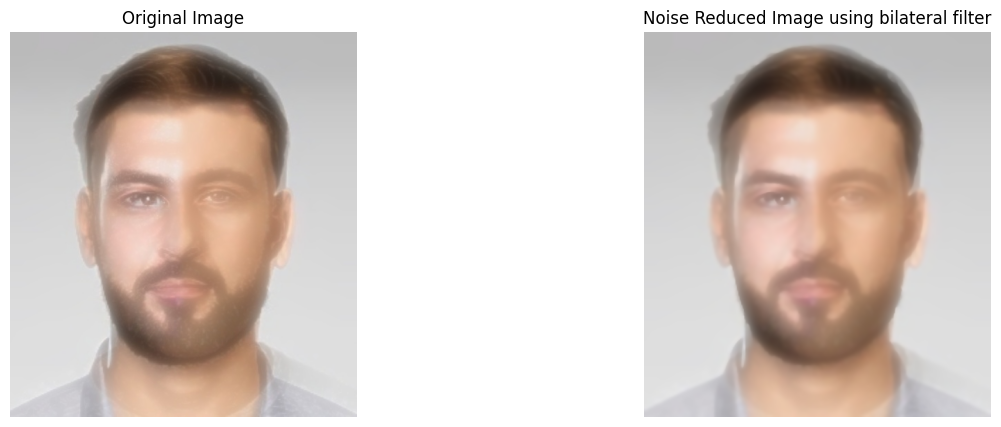

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to reduce noise in an image using bilateral filtering
def reduce_noise(image):
    # Apply bilateral filter with d=9, sigmaColor=75, sigmaSpace=75
    # These parameters can be adjusted to achieve the desired noise reduction
    return cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Function to load an image from a file path
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found.")
    return image

# Function to display images side by side
def display_side_by_side(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Replace 'path_to_your_image.jpg' with the path to the image you want to process
image_path = 'blended_image.jpg'

# Load the image from file
original_image = load_image(image_path)

# Reduce noise in the image
noise_reduced_image = reduce_noise(original_image)

# Display the original and the noise-reduced image side by side
display_side_by_side([original_image, noise_reduced_image], titles=["Original Image", "Noise Reduced Image using bilateral filter"])


**Both Laplacian Pyramid blending and Gaussian Pyramid blending are techniques commonly used in facial morphing and image blending applications.**

**Laplacian Pyramid blending:** In this technique, the images are decomposed into Laplacian Pyramids, which represent the images at different scales. Then, blending is performed by combining corresponding levels of the Laplacian Pyramids, followed by reconstruction to obtain the final blended image. This method is often used for seamless blending of images, including facial morphing, because it preserves details while blending smoothly between images.


**Gaussian Pyramid blending:** Similar to Laplacian Pyramid blending, Gaussian Pyramid blending involves decomposing the images into Gaussian Pyramids and then blending them at corresponding levels of the pyramid. However, Gaussian Pyramid blending tends to produce smoother transitions between images compared to Laplacian Pyramid blending, as it does not explicitly preserve details.

Both techniques are widely used in image processing and computer vision applications, including facial morphing, image stitching, and panoramic image generation, among others. They offer different trade-offs in terms of blending quality, computational complexity, and flexibility in controlling the blending process.







